In [1]:
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('images/camera/01.jpg',)
img = cv2.imread('images/mona-lisa.png',)
gray = np.float32(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
plt.imshow(img, 'gray'); plt.show()

# src - Input single-channel 8-bit or floating-point image.
# blockSize - Neighborhood size (tamanho da janela em torno do pixel).
# ksize - Aperture parameter for the Sobel operator.
# k - Harris response parameter. R = lambda1 x lambda2 - k (lambda1 + lambda2)^2
# borderType - Pixel extrapolation method. See #BorderTypes.
# dst - Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
dst = cv2.cornerHarris(gray,3,3,0.04)

# Aumenta tamanho dos pontos
dst = cv2.dilate(dst, None, iterations=3)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img); plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

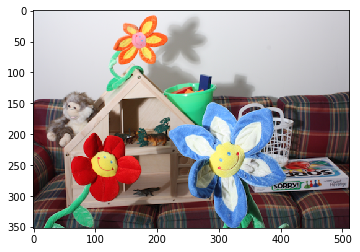

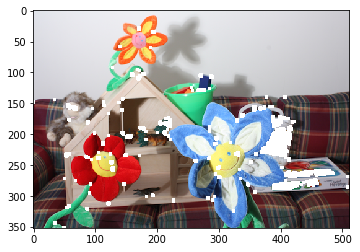

In [3]:
img = cv2.cvtColor(cv2.imread('images/flowers-left.png'),cv2.COLOR_BGR2RGB)

gray = np.float32(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY))
plt.imshow(img); plt.show()
dst = cv2.cornerHarris(gray,3,3,0.04)
dst = cv2.dilate(dst, None, iterations=2)
img[dst>0.03*dst.max()]=[255,255,255]
plt.imshow(img); plt.show()

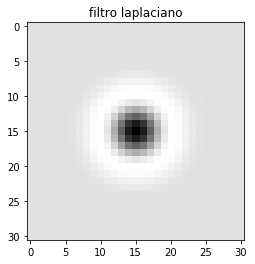

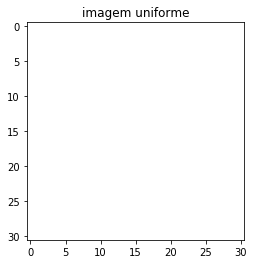

laplaciano na imagem uniforme: 1.095217e+12
laplaciano no próprio filtro (máximo): 3.012148e+19 x uniforme


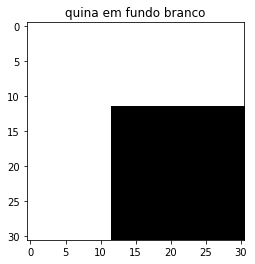

laplaciano na quina em fundo branco: 3.756962e+06 x uniforme


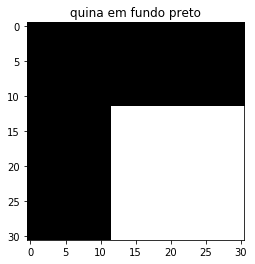

laplaciano na quina em fundo preto: -3.756961e+06 x uniforme


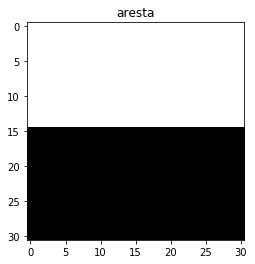

laplaciano em aresta: 6.686105e+05 x uniforme
3.756962e+06 / 6.686105e+05 = 5.6 x menor que a quina


In [4]:
# Efeito da aplicação do Laplaciano como detector de quinas

n = 31
impulse = np.zeros((n,n)); impulse[n//2,n//2]=1
laplacian = cv2.Laplacian(impulse,cv2.CV_64F,ksize=n)
plt.imshow(laplacian,'gray'); plt.title('filtro laplaciano'); plt.show()

img = 255*np.ones((n,n));
plt.imshow(img,'gray',vmin=0); plt.title('imagem uniforme'); plt.show()
uniforme = np.sum(laplacian * img)
print("laplaciano na imagem uniforme: {:e}".format(uniforme))
print("laplaciano no próprio filtro (máximo): {:e} x uniforme".format(np.sum(laplacian * laplacian) / uniforme))

img = 255*np.ones((n,n)); img[12:,12:]=0
plt.imshow(img,'gray'); plt.title('quina em fundo branco'); plt.show()
print("laplaciano na quina em fundo branco: {:e} x uniforme".format(np.sum(laplacian * img) / uniforme))

img = np.zeros((n,n)); img[12:,12:]=255
plt.imshow(img,'gray'); plt.title('quina em fundo preto'); plt.show()
print("laplaciano na quina em fundo preto: {:e} x uniforme".format(np.sum(laplacian * img) / uniforme))

img = 255*np.ones((n,n)); img[15:,:]=0
plt.imshow(img,'gray'); plt.title('aresta'); plt.show()
print("laplaciano em aresta: {:e} x uniforme".format(np.sum(laplacian * img) / uniforme))
print('3.756962e+06 / 6.686105e+05 = {:.1f} x menor que a quina'.format(3.756962e+06 / 6.686105e+05))

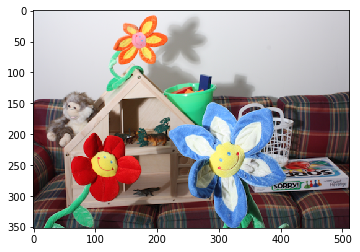

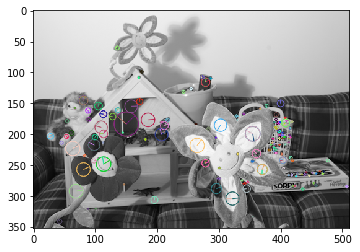

(506.4, 284.2), angulo: 196.9, tam: 3.8
(150.2, 183.7), angulo: 220.0, tam: 39.1
(150.2, 183.7), angulo: 315.1, tam: 39.1
(53.7, 203.8), angulo: 41.0, tam: 6.5
(135.7, 60.7), angulo: 202.0, tam: 6.5
(45.7, 213.8), angulo: 26.1, tam: 5.3
(397.3, 195.4), angulo: 266.5, tam: 4.8
(282.9, 191.1), angulo: 337.8, tam: 5.4
(339.9, 166.8), angulo: 216.3, tam: 4.0
(392.8, 189.2), angulo: 86.3, tam: 5.0


In [5]:
# SIFT
img = cv2.cvtColor(cv2.imread('images/flowers-left.png'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('images/flowers-left.png',0)
plt.imshow(img);plt.show()
#create([, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]) -> retval
# nfeatures: The number of best features to retain. The features are ranked by their scores
#            (measured in SIFT algorithm as the local contrast)
# nOctaveLayers: The number of layers in each octave. 3 is the value used in D. Lowe paper. The
#            number of octaves is computed automatically from the image resolution.
# contrastThreshold: The contrast threshold used to filter out weak features in semi-uniform
#          (low-contrast) regions. The larger the threshold, the less features are produced by the detector.
# edgeThreshold: The threshold used to filter out edge-like features. Note that the its meaning
#            is different from the contrastThreshold, i.e. the larger the edgeThreshold, the less features are
#            filtered out (more features are retained).
# sigma: The sigma of the Gaussian applied to the input image at the octave \#0.
sift = cv2.xfeatures2d.SIFT_create(200)

kp = sift.detect(gray)
# cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img); plt.show()

for p in kp[:10]:
    print("(%.1f, %.1f), angulo: %.1f, tam: %.1f" % (p.pt[0], p.pt[1], p.angle, p.size))

In [6]:
# Calcula os descritores de um vetor de KeyPoints
new_kp, des = sift.compute(gray,kp)
print(des[0])

# 'detectAndCompute' faz as duas tarefas (detecção e keypoints e cálculo dos descritores)
kp, des = sift.detectAndCompute(gray,None)
print(des[0])
print(des.shape)

[  0.   0.   4.   4.   0.   2.  26.   5.   1.   1.   7.  22.   8.  13.
  73.  17.   0.   0.   1.  14.  14.   7. 117.  62.   0.   0.   4.   4.
   1.   0. 135. 135.  13.   2.   7.   3.   0.   0.   0.   8. 119.   5.
  10.   9.   2.   2.  78. 135.  14.   2.   3.   6.  10.   8. 135. 135.
   7.   5.  20.  12.   1.   2. 117. 122.   9.   0.   0.   0.   0.   0.
   0.   4. 135.  43.   0.   0.   2.   1.   6.  61.  82.  15.   2.   7.
  22.  23.  81.  39.   2.   3.   8.   6.   1.  33.  83.  15.   0.   0.
   0.   0.   0.   0.   0.   0. 135.  37.   0.   0.   0.   0.   0.   2.
 135.  45.   0.   0.   0.   2.  34.  21.   3.   0.   0.   0.   0.  19.
  68.  19.]
[  0.   0.   4.   4.   0.   2.  26.   5.   1.   1.   7.  22.   8.  13.
  73.  17.   0.   0.   1.  14.  14.   7. 117.  62.   0.   0.   4.   4.
   1.   0. 135. 135.  13.   2.   7.   3.   0.   0.   0.   8. 119.   5.
  10.   9.   2.   2.  78. 135.  14.   2.   3.   6.  10.   8. 135. 135.
   7.   5.  20.  12.   1.   2. 117. 122.   9.   0.   0.   0.   0.

In [1]:
# Feature Matching usando força bruta (testa todos os pares de pontos)
imL = cv2.imread('./images/flowers-left.png',0)#[50:100,150:200]
imR = cv2.imread('./images/flowers-right.png',0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2) # Retorna os 2 melhores vizinhos de cada ponto

# Avalia a razão entre os dois melhores (como explicado nos slides)
good = []
for m,n in matches:
    if m.distance < 0.2*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(imL,kp1,imR,kp2,good,None,flags=2)
plt.imshow(img3); plt.show()

for i in range(10):
    print(matches[i][0].distance, matches[i][1].distance)
for i in range(10):
    print(good[i][0].distance)

NameError: name 'cv2' is not defined

In [ ]:
# A biblioteca FLANN possui algoritmo eficientes para encontrar os vizinhos mais próximos
imL = cv2.imread('images/flowers-left.png',0)#[50:100,150:200]
imR = cv2.imread('images/flowers-right.png',0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN ao invés de força bruta
flann = cv2.FlannBasedMatcher() # Default KDTREE. Permite mudar algoritmo e parâmetros dos algoritmos (ver doc).
matches = flann.knnMatch(des1,des2,k=2)

# Avalia a razão entre os dois melhores (como explicado nos slides)
good = []
for m,n in matches:
    if m.distance < 0.2*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(imL,kp1,imR,kp2,good,None,flags=2)
plt.imshow(img3); plt.show()

In [3]:
imL = cv2.imread('images/controle_remoto.jpg',0) # sem reduzir não funcionou bem: escala muito difer.
imR = cv2.imread('images/notebook.jpg',0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(imL,None)
kp2, des2 = sift.detectAndCompute(imR,None)

# FLANN ao invés de força bruta
flann = cv2.FlannBasedMatcher() # Default KDTREE. Permite mudar algoritmo e parâmetros dos algoritmos (ver doc).
matches = flann.knnMatch(des1,des2,k=2)

# Seleciona os vizinhos com melhor razão de distância comparado com o 2o vizinho (como explicado nos slides)
good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        good.append(m)

# Extrai as posições dos keypoints das duas imagens correspondentes aos pontos no vetor 'good'
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist() # inliers

# Aplica a homografia nos pontos extremos de imL (controle remoto), encontrando suas posições em imR
h,w = imL.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
# Desenha polígono em imR entre os pontos transformados
imR = cv2.polylines(imR,[np.int32(dst)],True,255,3, cv2.LINE_AA)

img3 = cv2.drawMatches(imL,kp1,imR,kp2,good,None)
plt.imshow(img3, 'gray'); plt.show()

img3 = cv2.drawMatches(imL,kp1,imR,kp2,good,None,matchesMask = matchesMask)
plt.imshow(img3, 'gray'); plt.show()

error: /home/travis/miniconda/conda-bld/conda_1486587069159/work/opencv-3.1.0/build/opencv_contrib/modules/xfeatures2d/src/sift.cpp:770: error: (-5) image is empty or has incorrect depth (!=CV_8U) in function detectAndCompute


## Locality based hashing
<img src="images/teoria/locality_based_hashing.png" width=800>
Bom quando os pontos são uniformemente distribuídos no espaço. Caso contrário, muitos pontos caem na mesma região.

## Best bin first

Uma k-d tree recursivamente divide o espaço encontrando um limiar em uma das dimensões que melhor divide os pontos. Podemos construir uma árvore usando estes limiares. Quando chega um ponto para consultar, podemos percorrer a árvore até encontrar a região folha que contém este ponto. Em seguida, aplicamos um backtrack na árvore para explorar pontos próximos na árvore, calculando as distâncias e retornando o mais próximo encontrado após um determinado número de iterações. Quando um nó interno representa um limiar mais distante do ponto de consulta que o ponto da região inicial, todo o ramo abaixo dele é podado da árvore.

O best bin first é uma adaptação da k-d tree. Ao invés de explorar os pontos próximos na árvore, exploramos as regiões vizinhas. Para determinar a distância de uma região (delimitada na dimensão $d$ pelo liminar $t$) para o ponto $(p_1 \ldots p_n)$, basta calcular $|t - p_d|$. Ao investigar uma das regiões filhas, colocamos a outra região filha em uma heap, ordenado pela distância até o ponto consultado. A próxima região investigada é retirada da heap. Inicializamos a heap com as regiões vizinhas da região inicial. Paramos depois de uma quatidade determinada de iterações.